<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

<h3 style="text-align: center;"><b>Работу выполнил Кирилл Лаврентьев. Ник на Kaggle: Кирилл_Лаврентьев</b></h3>

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data2 = pd.read_csv('./test.csv')

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Смотрим на случайные пять строк датасета. 

In [6]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1479,19,24.10,439.2,Male,0,No,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
1103,2,95.50,181.65,Male,1,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
4502,19,87.70,1725.95,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),0
1894,30,51.20,1561.5,Female,0,Yes,Yes,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),1
4518,4,68.65,261.25,Female,0,No,No,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1


In [7]:
data.shape # размер датасета

(5282, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Таблица с количеством NaN в каждой колонке.

In [9]:
data.isna().describe()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282


In [10]:
a = data.isnull().sum()
b = pd.DataFrame(a, columns = ['Nan_counts'])
b

,Nan_counts
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Смотрим сколько всего разных значений в категориальных признаках.

In [11]:
for i in cat_cols:
    print(data[i].value_counts(),'\n')

Male      2655
Female    2627
Name: Sex, dtype: int64 

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

No     2705
Yes    2577
Name: HasPartner, dtype: int64 

No     3676
Yes    1606
Name: HasChild, dtype: int64 

Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64 

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64 

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess,

Смотрим сколько всего значений nan в каждом столбце, учитывая, что длина датасета равна 5282.

In [12]:
for i in feature_cols:
    print(data[i].isna().value_counts(),'\n')

False    5282
Name: ClientPeriod, dtype: int64 

False    5282
Name: MonthlySpending, dtype: int64 

False    5282
Name: TotalSpent, dtype: int64 

False    5282
Name: Sex, dtype: int64 

False    5282
Name: IsSeniorCitizen, dtype: int64 

False    5282
Name: HasPartner, dtype: int64 

False    5282
Name: HasChild, dtype: int64 

False    5282
Name: HasPhoneService, dtype: int64 

False    5282
Name: HasMultiplePhoneNumbers, dtype: int64 

False    5282
Name: HasInternetService, dtype: int64 

False    5282
Name: HasOnlineSecurityService, dtype: int64 

False    5282
Name: HasOnlineBackup, dtype: int64 

False    5282
Name: HasDeviceProtection, dtype: int64 

False    5282
Name: HasTechSupportAccess, dtype: int64 

False    5282
Name: HasOnlineTV, dtype: int64 

False    5282
Name: HasMovieSubscription, dtype: int64 

False    5282
Name: HasContractPhone, dtype: int64 

False    5282
Name: IsBillingPaperless, dtype: int64 

False    5282
Name: PaymentMethod, dtype: int64 



In [13]:
len(data[data['TotalSpent']==' '])

9

Видим, что в таблице отсутствуют значения NaN, но в начальных данных числовой столбец TotalSpent был записан как строка. Кроме того, пропуски в этом столбце записаны как пробелы ' '. Преобразуем этот столбец к типу float, пропуски заменим на 0.

In [14]:
def x(x):
    try:
        return (float(x))
    except ValueError:
        return (0)
    
data['TotalSpent'] = data['TotalSpent'].apply(x)


### Можно было ещё так найти пробелы и заменить их на ноль.

#### **Как видно выше, пропущенных значений в датасете не имеется, поэтому их заменять ничем не нужно.Однако один из численных признаков (что видно из data.info()) имеет тип 'object', поменяем его тип на 'float'.**

In [15]:
# data[num_cols[2]] = pd.to_numeric(data[num_cols[2]], errors='coerce')

In [16]:
# r = data.isnull().sum()
# g = pd.DataFrame(r, columns=['Nan_counts'])
# g

###**Теперь все числовые признаки имеют числовой тип данных, и у одного из них появилось 9 пропущенных значений, как видно выше. Заменим их средним значением по столбцу.**

In [17]:
# data.fillna(np.mean(data[num_cols[2]]), inplace = True)

In [18]:
# a = data.isnull().sum()
# b = pd.DataFrame(a, columns=['Nan_counts'])
# b

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Строим гистограммы для численных признаков. 

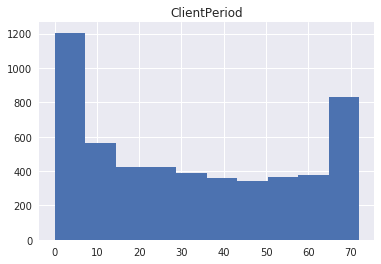

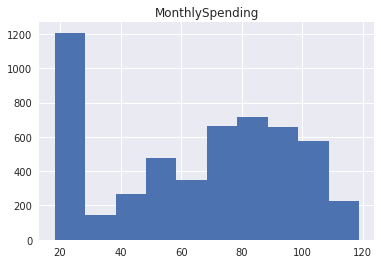

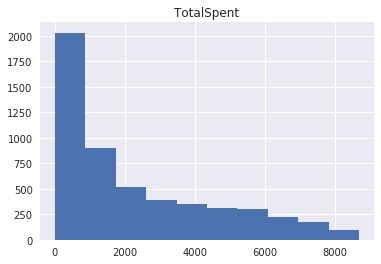

In [19]:
# Тут гистограммы строятся в нормальном масштабе 
for i in num_cols:
    plt.hist(x = data[i])
    plt.title(i)
    plt.grid(True)
    plt.show()

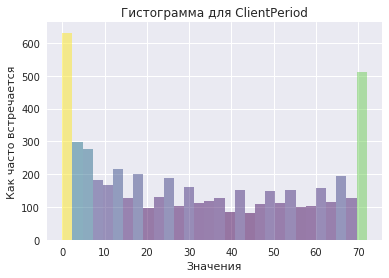

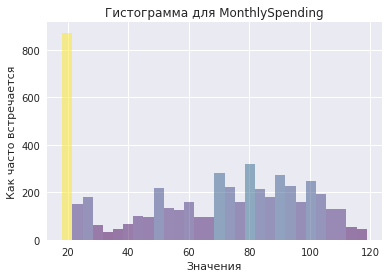

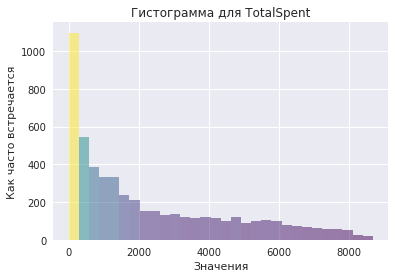

In [20]:
for i in num_cols:
    x = list(data[i].values)

    num_bins = 30
    # the histogram of the data
    n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5) #, normed=1

    fracs = n / n.max()
    norm = colors.Normalize(fracs.min(), fracs.max())


    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.xlabel('Значения')
    plt.ylabel('Как часто встречается')
    plt.title(r'Гистограмма для '+ i)  
    plt.show()

Строим круговые диаграммы для категориальных признаков. 

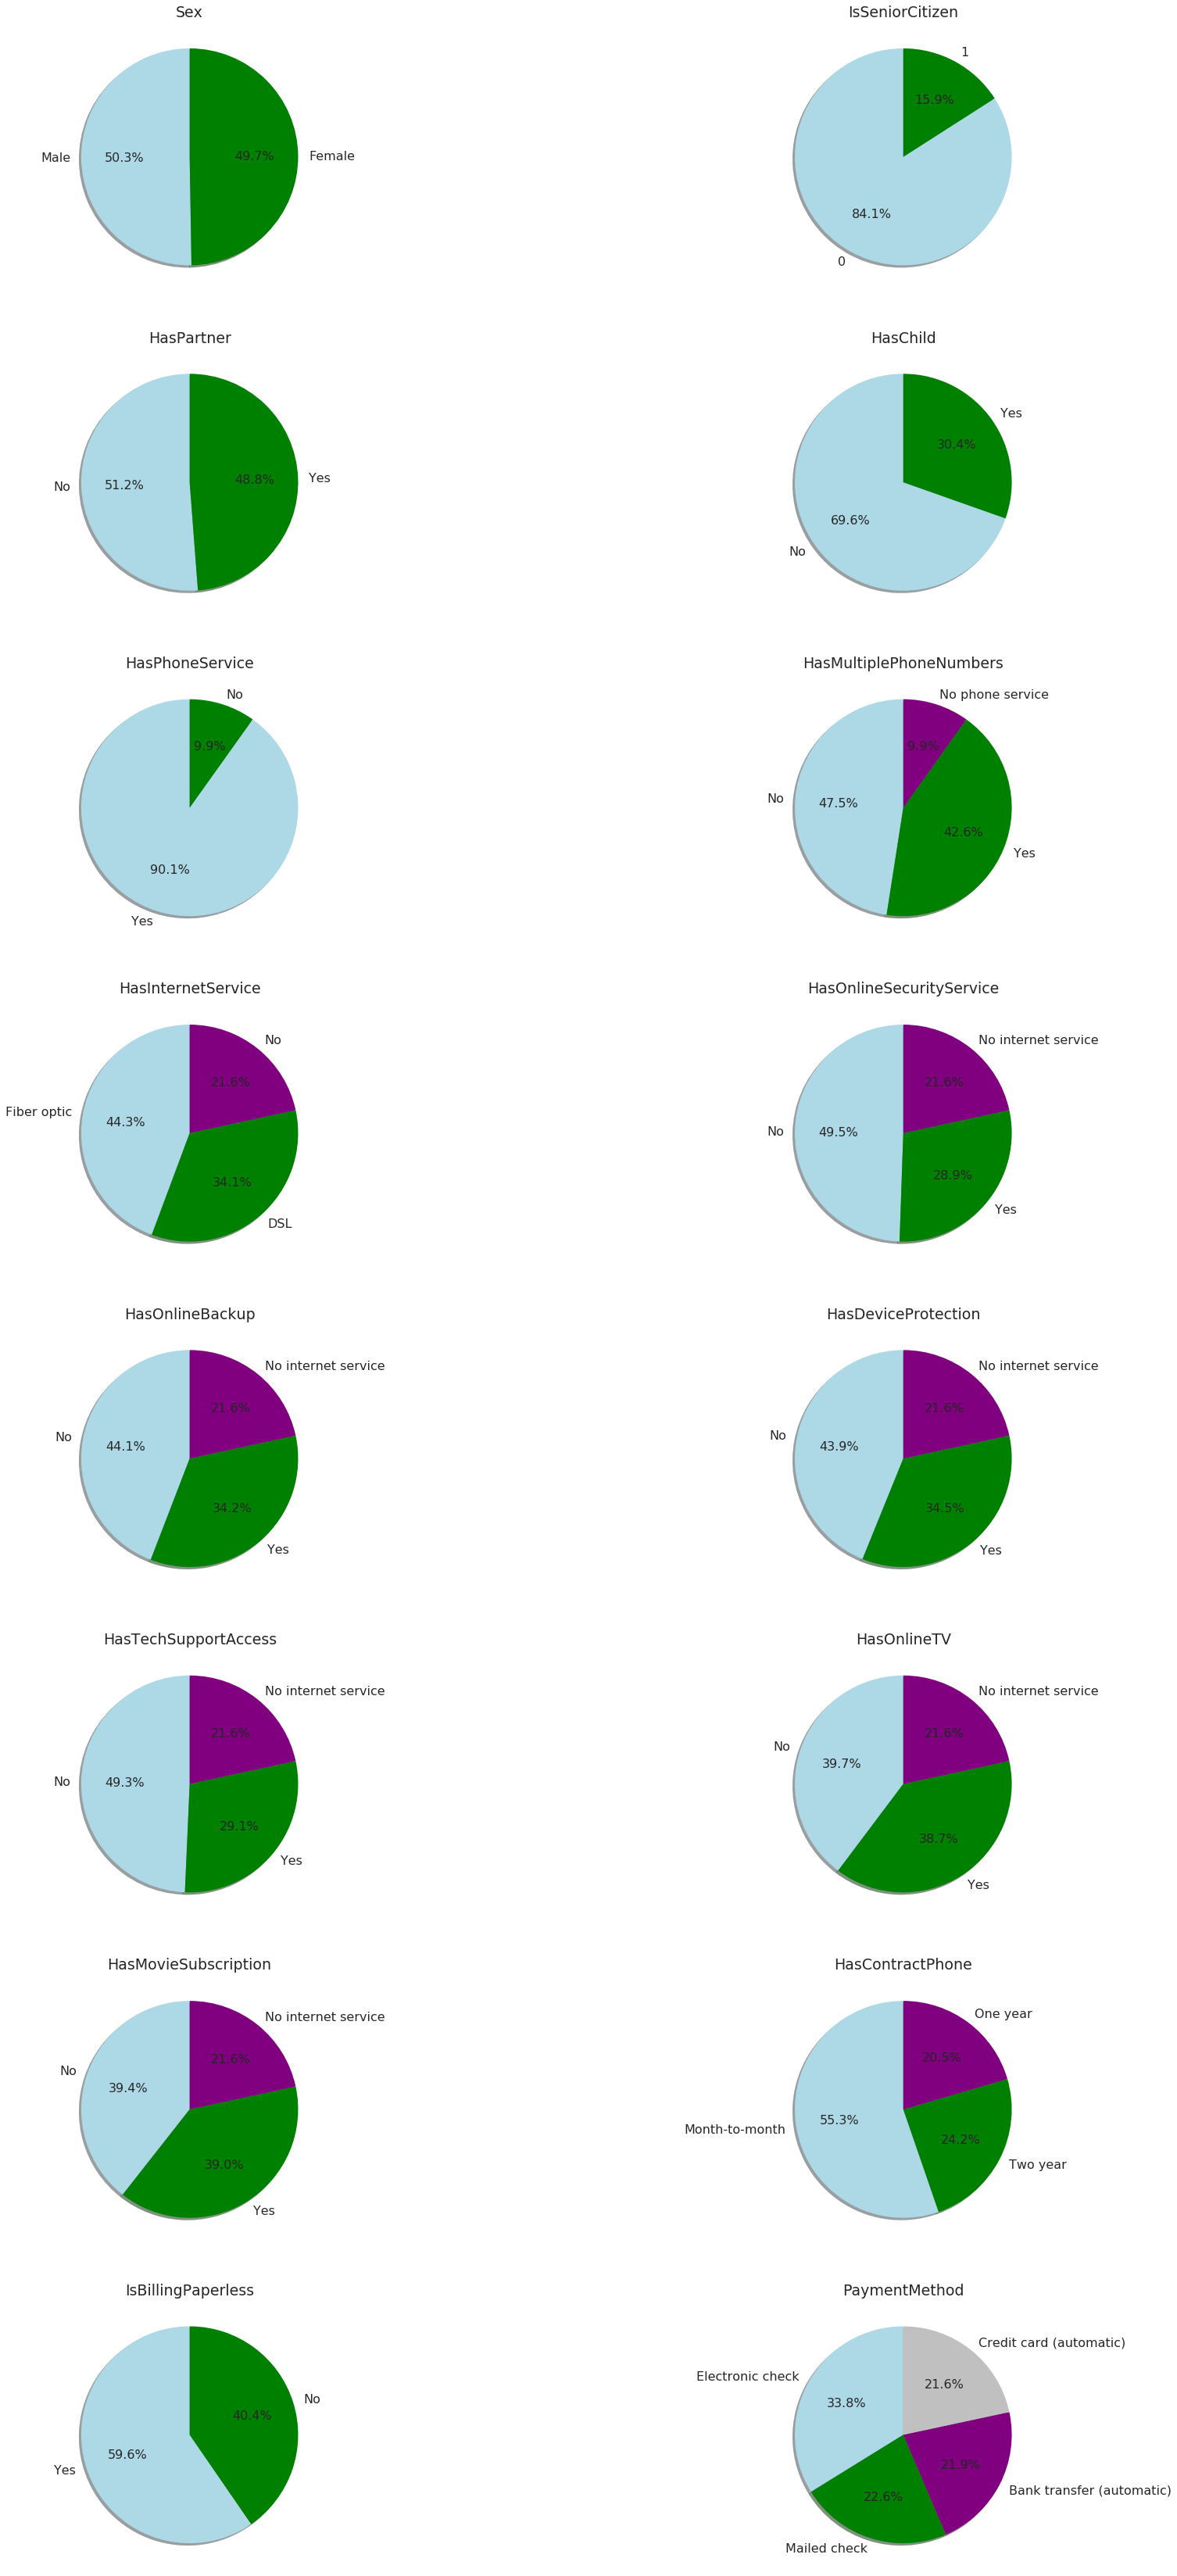

In [21]:
%matplotlib inline
fig = plt.figure(figsize=(30, 60))
num = 1
fontsize = 16 # размер текста в диаграммах

for name_col in cat_cols:
    plt.rcParams['font.size'] = fontsize
    plt.subplot(8, 2, num)
    val_cnt = data[name_col].value_counts()
    labels = list(val_cnt.keys())
    plt.pie(val_cnt, labels=labels,colors = ['LightBlue', 'Green', 'Purple','Silver'],
            autopct='%1.1f%%',shadow = True,startangle = 90,textprops = {'fontsize': fontsize})
    plt.title(name_col,fontsize = fontsize + 3)
    num += 1


In [22]:
a = list(data[target_col].value_counts().values)
print('Отношение классов в целевой переменной: ',np.round(a[0]/a[1],2))
print('Вполне сбалансированная выборка.')

Отношение классов в целевой переменной:  2.82
Вполне сбалансированная выборка.


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

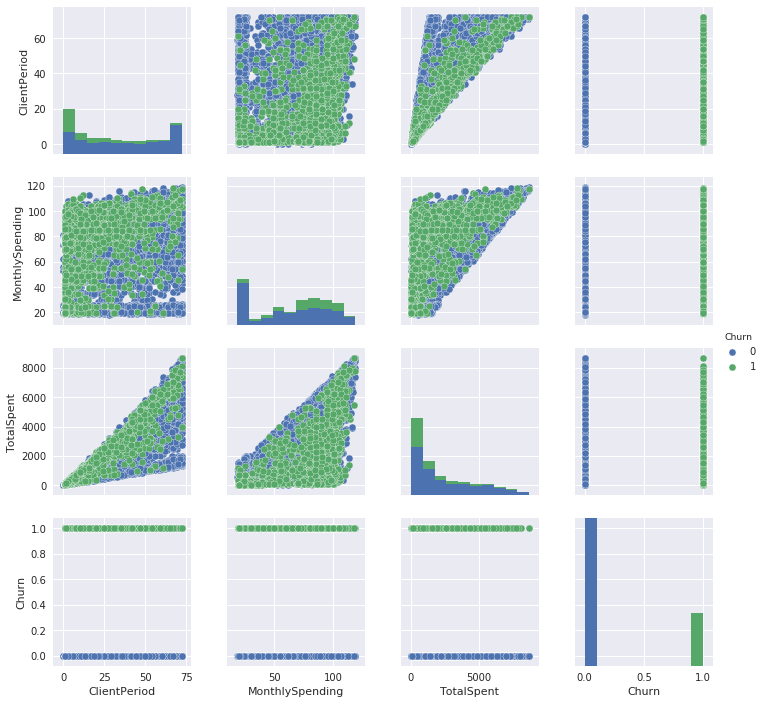

In [23]:
data1 = data[num_cols].copy()
data1['Churn'] = data['Churn']
sns.set()
sns.pairplot(data1,hue = 'Churn')

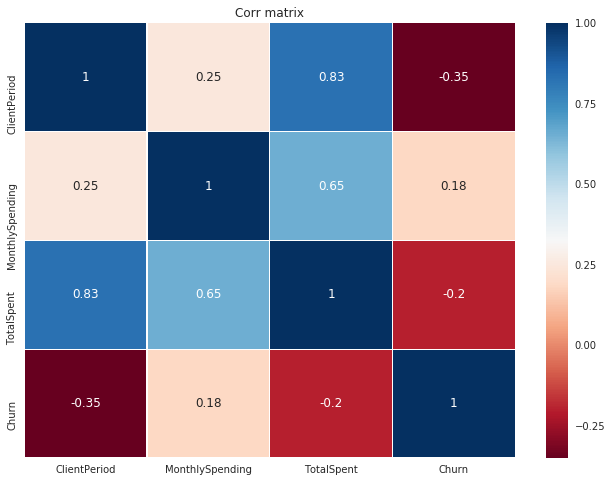

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(11,8))
plt.title('Corr matrix')
sns.heatmap(data[num_cols+[target_col]].corr(), annot=True, linewidths=0.1, cmap=colormap);

Посмотрим, что больше всего влияет на появление класса 1.

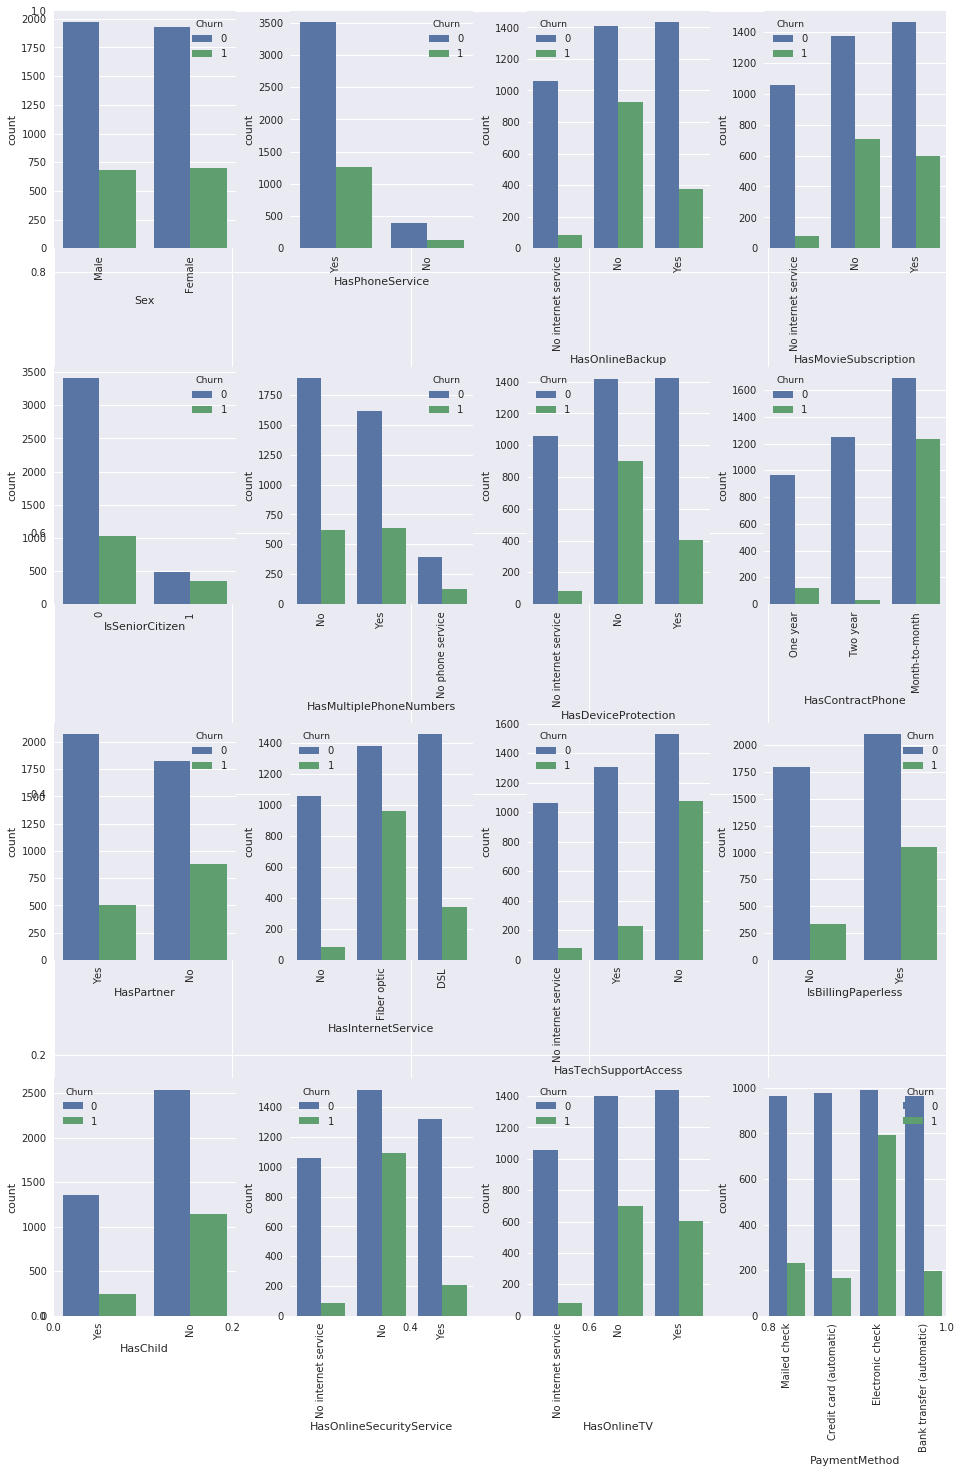

In [25]:
fig, axes = plt.subplots(figsize=(16, 24))
gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.3, hspace=0.5)

for k in range(len(cat_cols)):
    i = k % 4
    j = k // 4
    fig.add_subplot(gs[i, j])
    sns.countplot(x=cat_cols[k], data=data, hue='Churn')
    plt.xticks(rotation=90)
    
plt.show()

### *Посмотрим выбросы относительно target через jointplot*

In [26]:
# for col in num_cols:
#     sns.jointplot(x=col, y=target_col, data=data)

Заметим выброс в зависимости TotalSpent и Churn при Churn = 1. 
Попытаемся его найти и убрать

In [27]:
# data[data[target_col]==1][['TotalSpent']].describe()
# # Посмотрим на информацию о столбце до удаления выброса

In [28]:
# outliyer_index = data[(data[target_col]==1) & (data['TotalSpent']==data['TotalSpent'].max())].index

# data.drop(outliyer_index)[data.drop(outliyer_index)[target_col] == 1][['TotalSpent']].describe()
# # Заметим, что после удаления выброса у нас снизилось стандратное отклонение, 
# # а значит теперь данные лучше отражают зависимость с целевой переменной

In [29]:
# sns.jointplot(x='TotalSpent', y='Churn', data=data.drop(outliyer_index));

In [30]:
# data.drop(outliyer_index, inplace=True)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [31]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Выполняем one-hot-encoding для категориальных признаков:

In [32]:
dummy_features = pd.get_dummies(data[cat_cols])

In [33]:
X = pd.concat([data[num_cols], dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Проверяем, что в матрице Х нет целевого признака. Отдельно выносим target в переменную у.

In [34]:
target_col in list(X.columns)

False

In [35]:
y = data[target_col]

In [36]:
X.shape, X_origin.shape

((5282, 45), (5282, 19))

Теперь всё готово для обучения алгоритмов.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

### Нормировка признаков

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`StandardScaler` выполняет преобразование $$z = \frac{x - \mu}{\sigma}, \text{где $\sigma$ - стандартное отклонение, а  $\mu$ - среднее}$$

### LogisticRegressionCV

In [39]:
searchCV = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-10, 10)))
    ,penalty='l2'
    ,scoring='roc_auc'
    ,cv=5
    ,random_state=42
    ,max_iter=10000
    ,fit_intercept=True
    ,solver ='newton-cg'
    ,tol=10
    ,refit=True
)
searchCV.fit(X_train_scaled, y_train)

print ('Max auc_roc:', searchCV.scores_[1].mean(axis=0).max())


Max auc_roc: 0.8482876957297364


### GridSearchCV

In [40]:
grid = {
    'C': np.power(10.0, np.arange(-10, 10))
     , 'solver': ['newton-cg','lbfgs', 'sag', 'saga','liblinear']
}
clf = LogisticRegression(penalty ='l2', random_state=42, max_iter=10000, tol=10)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=5)
gs.fit(X_train_scaled, y_train)

print ('gs.best_score_:', gs.best_score_)
print('gs.best_params_:', gs.best_params_)

gs.best_score_: 0.8484134220485449
gs.best_params_: {'C': 100.0, 'solver': 'lbfgs'}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество 0.8484 получено на GridSearchCV c параметрами С = 100, solver = lbfgs. 

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

## XGBoost

In [41]:
import xgboost

Добавляем два новых признака: MonthlySpending делим на ClientPeriod и TotalSpent делим на MonthlySpending.

In [59]:
X['MonthSpend/CliPeriod'] = X['MonthlySpending']/X['ClientPeriod']
X['TotalSpent/MonthSpend'] = X['TotalSpent']/X['MonthlySpending']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [61]:
boosting_model = xgboost.XGBClassifier(n_estimators=500,learning_rate = 0.1, max_depth = 1,subsample = 0.7,
                                      reg_alpha=4,reg_lambda=10)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

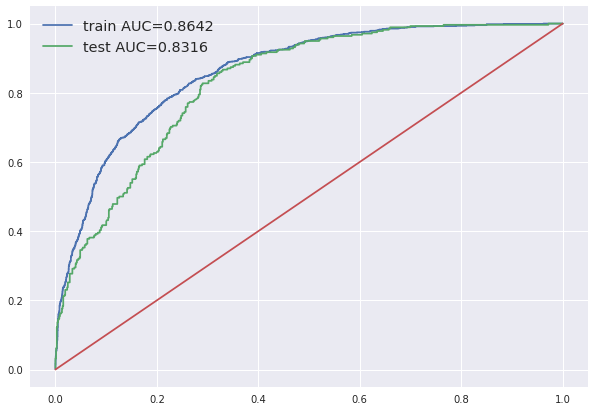

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## CatBoost

In [46]:
import catboost # документация: https://catboost.ai/docs
from sklearn.model_selection import train_test_split

Добавляем два новых признака: MonthlySpending делим на ClientPeriod и TotalSpent делим на MonthlySpending.

In [47]:
X_origin['MonthSpend/CliPeriod'] = X_origin['MonthlySpending']/X_origin['ClientPeriod']
X_origin['TotalSpent/MonthSpend'] = X_origin['TotalSpent']/X_origin['MonthlySpending']

In [48]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [49]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [50]:
categorical_indices = np.array([3,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [51]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, learning_rate = 0.1,depth=1,l2_leaf_reg=0.1,
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6513018	total: 53.6ms	remaining: 10.7s
1:	learn: 0.6179681	total: 57.1ms	remaining: 5.65s
2:	learn: 0.5960436	total: 59.3ms	remaining: 3.9s
3:	learn: 0.5703698	total: 61.7ms	remaining: 3.02s
4:	learn: 0.5525266	total: 63.9ms	remaining: 2.49s
5:	learn: 0.5411489	total: 66.2ms	remaining: 2.14s
6:	learn: 0.5300259	total: 68.6ms	remaining: 1.89s
7:	learn: 0.5222298	total: 70.9ms	remaining: 1.7s
8:	learn: 0.5148441	total: 73.1ms	remaining: 1.55s
9:	learn: 0.5077240	total: 75.4ms	remaining: 1.43s
10:	learn: 0.4997393	total: 77.6ms	remaining: 1.33s
11:	learn: 0.4879397	total: 79.9ms	remaining: 1.25s
12:	learn: 0.4790664	total: 82.3ms	remaining: 1.18s
13:	learn: 0.4743178	total: 84.7ms	remaining: 1.13s
14:	learn: 0.4687262	total: 87ms	remaining: 1.07s
15:	learn: 0.4655623	total: 88.9ms	remaining: 1.02s
16:	learn: 0.4611215	total: 91.1ms	remaining: 980ms
17:	learn: 0.4562248	total: 93.4ms	remaining: 945ms
18:	learn: 0.4523337	total: 95.7ms	remaining: 912ms
19:	learn: 0.4486873	total

170:	learn: 0.3997302	total: 448ms	remaining: 75.9ms
171:	learn: 0.3997302	total: 451ms	remaining: 73.4ms
172:	learn: 0.3997047	total: 454ms	remaining: 70.9ms
173:	learn: 0.3996401	total: 457ms	remaining: 68.3ms
174:	learn: 0.3996388	total: 460ms	remaining: 65.7ms
175:	learn: 0.3996387	total: 463ms	remaining: 63.1ms
176:	learn: 0.3995997	total: 465ms	remaining: 60.4ms
177:	learn: 0.3995581	total: 468ms	remaining: 57.8ms
178:	learn: 0.3995536	total: 471ms	remaining: 55.3ms
179:	learn: 0.3995535	total: 474ms	remaining: 52.7ms
180:	learn: 0.3994997	total: 477ms	remaining: 50.1ms
181:	learn: 0.3994960	total: 480ms	remaining: 47.5ms
182:	learn: 0.3994958	total: 483ms	remaining: 44.9ms
183:	learn: 0.3994957	total: 486ms	remaining: 42.3ms
184:	learn: 0.3994881	total: 490ms	remaining: 39.7ms
185:	learn: 0.3994559	total: 493ms	remaining: 37.1ms
186:	learn: 0.3994497	total: 498ms	remaining: 34.6ms
187:	learn: 0.3994031	total: 501ms	remaining: 32ms
188:	learn: 0.3993478	total: 503ms	remaining: 29

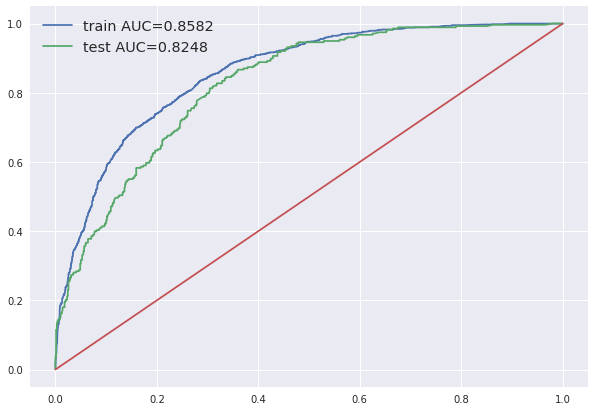

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

#### Лучшее качество на Kaggle: 0.85479
с параметрами XGBClassifier(n_estimators=500,learning_rate = 0.1, max_depth = 1,subsample = 0.7,
                                       reg_alpha=4,reg_lambda=10)

В данных в столбце TotalSpent ' ' заменил на 0.

Добавил новые признаки: 
* X['MonthSpend/CliPeriod'] = X['MonthlySpending']/X['ClientPeriod']
* X['TotalSpent/MonthSpend'] = X['TotalSpent']/X['MonthlySpending']

# Предсказания

в зависимости от модели запускаем либо ячейки для XGBoost, либо для CatBoost

#### Для XGBoost

In [63]:
best_model = boosting_model
# какая-то предыдущая модель

In [64]:
X_test = pd.read_csv('./test.csv')
dummy_features = pd.get_dummies(X_test[cat_cols])
X_test = pd.concat([X_test[num_cols], dummy_features], axis=1)

In [65]:
def x(x):
    try:
        return (float(x))
    except ValueError:
        return (0)

In [66]:
X_test['TotalSpent'] = X_test['TotalSpent'].apply(x)

In [67]:
X_test['MonthSpend/CliPeriod'] = X_test['MonthlySpending']/X_test['ClientPeriod']
X_test['TotalSpent/MonthSpend'] = X_test['TotalSpent']/X_test['MonthlySpending']

In [68]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test.values)[:,1]
submission.to_csv('./my_submission.csv',index = False)

#### Для CatBoost

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('./test.csv')

X_test['TotalSpent'] = X_test['TotalSpent'].apply(x)
X_test['MonthSpend/CliPeriod'] = X_test['MonthlySpending']/X_test['ClientPeriod']
X_test['TotalSpent/MonthSpend'] = X_test['TotalSpent']/X_test['MonthlySpending']

In [ ]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv',index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

<h3 style="text-align: center;"><b>Работу выполнил Кирилл Лаврентьев. Ник на Kaggle: Кирилл_Лаврентьев</b></h3>